In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset

In [89]:
df = pd.read_csv('artifacts/Batsman_data.csv')

In [90]:
## top 5 records of data set

df.head()

,POS,Player,Team,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Virat Kohli,RCB,237,229,34,7263,113,37.25,5586,130.02,7,50,643,234
1,2,Shikhar Dhawan,PKBS,217,216,29,6617,106*,35.39,5203,127.18,2,50,750,148
2,3,David Warner,DC,176,176,22,6397,126,41.54,4572,139.92,4,60,646,226
3,4,Rohit Sharma,MI,243,238,28,6211,109*,29.58,4776,130.05,1,42,554,257
4,5,Suresh Raina,CSK,205,200,30,5528,100*,32.52,4042,136.76,1,39,506,203


In [91]:
## All columns in dataset 
df.columns

Index(['POS', 'Player', 'Team', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF',
       'SR', '100', '50', '4s', '6s'],
      dtype='object')

In [92]:
## Shape of the data
df.shape

(135, 15)

In [93]:
## Basic Information of the Data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     135 non-null    int64  
 1   Player  135 non-null    object 
 2   Team    135 non-null    object 
 3   Mat     135 non-null    int64  
 4   Inns    135 non-null    int64  
 5   NO      135 non-null    int64  
 6   Runs    135 non-null    int64  
 7   HS      135 non-null    object 
 8   Avg     135 non-null    float64
 9   BF      135 non-null    int64  
 10  SR      135 non-null    float64
 11  100     135 non-null    int64  
 12  50      135 non-null    int64  
 13  4s      135 non-null    int64  
 14  6s      135 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 15.9+ KB


In [94]:
df.describe()

,POS,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,68.000000,90.762963,81.096296,15.014815,1923.725926,28.540370,1453.318519,132.429407,0.614815,10.933333,176.577778,74.955556
std,39.115214,57.184724,51.290346,13.869856,1468.473298,7.030537,1098.333063,12.339804,1.209324,11.061025,142.359827,62.754897
min,1.000000,13.000000,13.000000,0.000000,503.000000,11.710000,310.000000,106.810000,0.000000,0.000000,34.000000,9.000000
25%,34.500000,44.000000,39.500000,5.000000,826.500000,23.165000,652.000000,123.885000,0.000000,3.500000,71.000000,31.500000
50%,68.000000,81.000000,71.000000,11.000000,1405.000000,27.690000,1118.000000,130.640000,0.000000,7.000000,121.000000,50.000000
75%,101.500000,119.500000,101.000000,21.000000,2655.500000,32.540000,1945.500000,138.795000,1.000000,15.000000,246.000000,98.000000
max,135.000000,250.000000,238.000000,87.000000,7263.000000,48.630000,5586.000000,174.000000,7.000000,60.000000,750.000000,357.000000


## Data Cleaning

In [95]:
## Checking Null Values
df.isnull().sum()

POS       0
Player    0
Team      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

There is no Null Values in the Dataset

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     135 non-null    int64  
 1   Player  135 non-null    object 
 2   Team    135 non-null    object 
 3   Mat     135 non-null    int64  
 4   Inns    135 non-null    int64  
 5   NO      135 non-null    int64  
 6   Runs    135 non-null    int64  
 7   HS      135 non-null    object 
 8   Avg     135 non-null    float64
 9   BF      135 non-null    int64  
 10  SR      135 non-null    float64
 11  100     135 non-null    int64  
 12  50      135 non-null    int64  
 13  4s      135 non-null    int64  
 14  6s      135 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 15.9+ KB


In [97]:
# Converting HS (Highest Score) Column from object into int 
df['HS'] = df['HS'].astype(str)
df['HS'] = df['HS'].str.replace('*',' ')

In [98]:
df['HS'] = df['HS'].astype(int)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     135 non-null    int64  
 1   Player  135 non-null    object 
 2   Team    135 non-null    object 
 3   Mat     135 non-null    int64  
 4   Inns    135 non-null    int64  
 5   NO      135 non-null    int64  
 6   Runs    135 non-null    int64  
 7   HS      135 non-null    int32  
 8   Avg     135 non-null    float64
 9   BF      135 non-null    int64  
 10  SR      135 non-null    float64
 11  100     135 non-null    int64  
 12  50      135 non-null    int64  
 13  4s      135 non-null    int64  
 14  6s      135 non-null    int64  
dtypes: float64(2), int32(1), int64(10), object(2)
memory usage: 15.4+ KB


HS column converted from object into int

In [100]:
## Checking the duplicate columns

In [101]:
df.duplicated().sum()

0

There is no duplicate columms

## Exploratory Data Analysis

In [102]:
df.head()

,POS,Player,Team,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Virat Kohli,RCB,237,229,34,7263,113,37.25,5586,130.02,7,50,643,234
1,2,Shikhar Dhawan,PKBS,217,216,29,6617,106,35.39,5203,127.18,2,50,750,148
2,3,David Warner,DC,176,176,22,6397,126,41.54,4572,139.92,4,60,646,226
3,4,Rohit Sharma,MI,243,238,28,6211,109,29.58,4776,130.05,1,42,554,257
4,5,Suresh Raina,CSK,205,200,30,5528,100,32.52,4042,136.76,1,39,506,203


#### Top 10 Batsman with Highest Runs

In [103]:
df = df.sort_values(by='Runs',ascending=False)

In [104]:
df.head(10)

,POS,Player,Team,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Virat Kohli,RCB,237,229,34,7263,113,37.25,5586,130.02,7,50,643,234
1,2,Shikhar Dhawan,PKBS,217,216,29,6617,106,35.39,5203,127.18,2,50,750,148
2,3,David Warner,DC,176,176,22,6397,126,41.54,4572,139.92,4,60,646,226
3,4,Rohit Sharma,MI,243,238,28,6211,109,29.58,4776,130.05,1,42,554,257
4,5,Suresh Raina,CSK,205,200,30,5528,100,32.52,4042,136.76,1,39,506,203
5,6,AB de Villiers,RCB,184,170,40,5162,133,39.70,3403,151.68,3,40,413,251
6,7,MS Dhoni,CSK,250,218,87,5082,84,38.79,3739,135.92,0,24,349,239
7,8,Chris Gayle,PBKS,142,141,16,4965,175,39.72,3333,148.96,6,31,405,357
8,9,Robin Uthappa,CSK,205,197,17,4952,88,27.51,3799,130.35,0,27,481,182
9,10,Dinesh Karthik,RCB,242,221,46,4516,97,25.81,3403,132.71,0,20,439,139


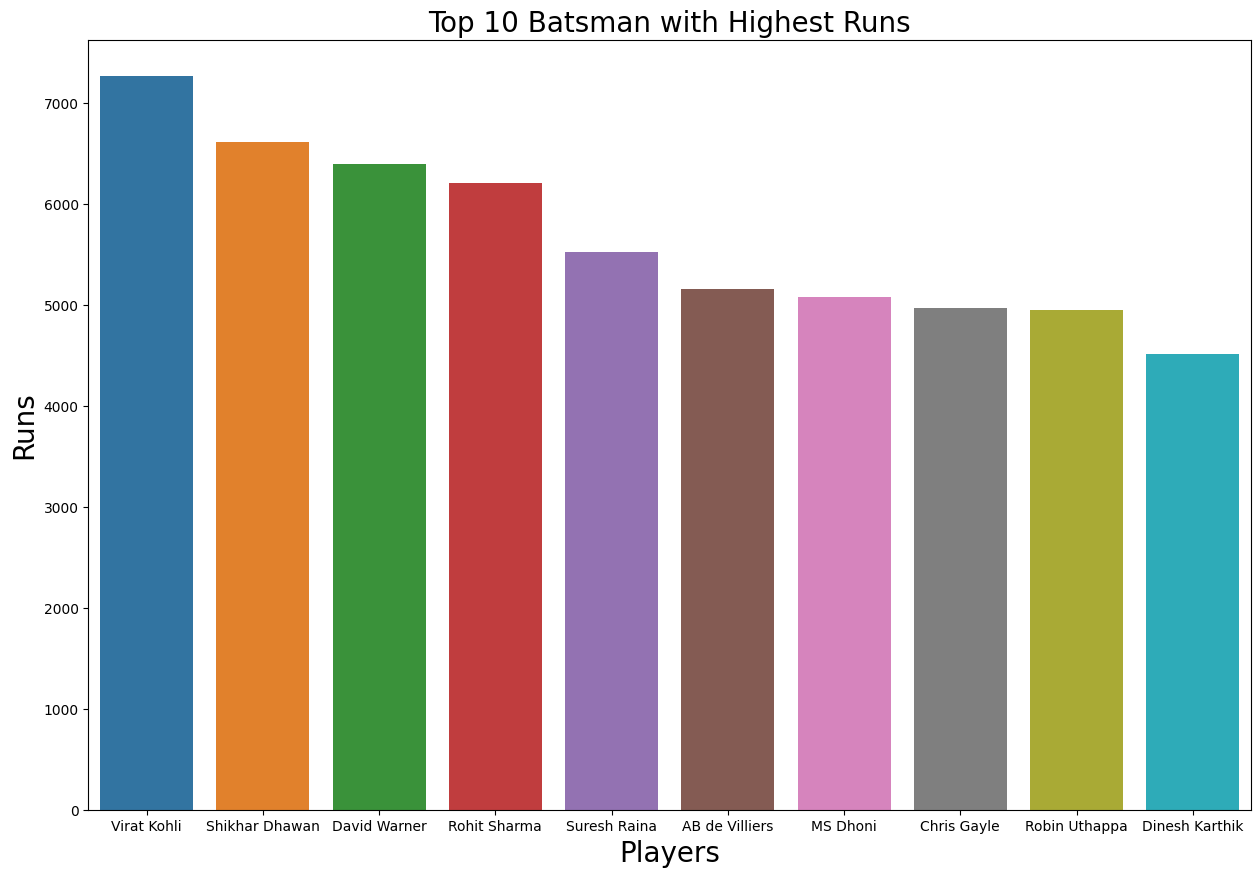

In [105]:
plt.figure(figsize=(15,10))
sns.barplot(data=df.head(10),x='Player',y='Runs')
plt.title("Top 10 Batsman with Highest Runs",{'fontsize':20})
plt.xlabel("Players",{'fontsize':20})
plt.ylabel("Runs",{'fontsize':20})
plt.show()

#### Top 10 Batsman with Highest Average

In [106]:
HAdf = df.sort_values(by='Avg',ascending=False)

In [107]:
HAdf.head(10)

,POS,Player,Team,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
95,96,Devon Conway,CSK,23,22,3,924,92,48.63,654,141.28,0,9,99,30
13,14,KL Rahul,LSG,118,109,20,4163,132,46.78,3097,134.42,4,33,355,168
131,132,Sai Sudharsan,GT,13,13,2,507,96,46.09,370,137.03,0,4,47,15
124,125,Hashim Amla,PBKS,16,16,3,577,104,44.38,407,141.77,2,3,60,21
2,3,David Warner,DC,176,176,22,6397,126,41.54,4572,139.92,4,60,646,226
82,83,Lendl Simmons,MI,29,29,2,1079,100,39.96,852,126.64,1,11,109,44
38,39,Shaun Marsh,PBKS,71,69,7,2477,115,39.95,1866,132.74,1,20,266,78
50,51,JP Duminy,MI,83,77,26,2029,78,39.78,1636,124.02,0,14,126,79
7,8,Chris Gayle,PBKS,142,141,16,4965,175,39.72,3333,148.96,6,31,405,357
5,6,AB de Villiers,RCB,184,170,40,5162,133,39.70,3403,151.68,3,40,413,251


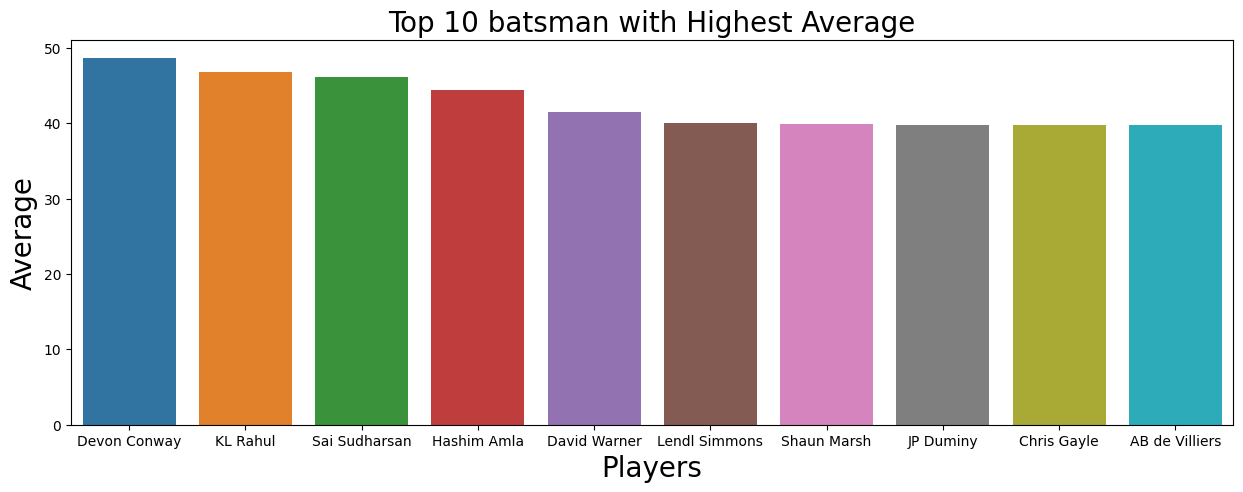

In [108]:
plt.figure(figsize=(15,5))
sns.barplot(data=HAdf.iloc[0:10],x='Player',y='Avg')
plt.title("Top 10 batsman with Highest Average",{"fontsize":20})
plt.xlabel("Players",{"fontsize":20})
plt.ylabel("Average",{"fontsize":20})
plt.show()

#### Top 5 players with Most 6's

In [109]:
df.head()

,POS,Player,Team,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Virat Kohli,RCB,237,229,34,7263,113,37.25,5586,130.02,7,50,643,234
1,2,Shikhar Dhawan,PKBS,217,216,29,6617,106,35.39,5203,127.18,2,50,750,148
2,3,David Warner,DC,176,176,22,6397,126,41.54,4572,139.92,4,60,646,226
3,4,Rohit Sharma,MI,243,238,28,6211,109,29.58,4776,130.05,1,42,554,257
4,5,Suresh Raina,CSK,205,200,30,5528,100,32.52,4042,136.76,1,39,506,203


In [113]:
most_sixes = df.sort_values(by='6s',ascending=False).head(5)

In [114]:
most_sixes

,POS,Player,Team,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
7,8,Chris Gayle,PBKS,142,141,16,4965,175,39.72,3333,148.96,6,31,405,357
3,4,Rohit Sharma,MI,243,238,28,6211,109,29.58,4776,130.05,1,42,554,257
5,6,AB de Villiers,RCB,184,170,40,5162,133,39.70,3403,151.68,3,40,413,251
6,7,MS Dhoni,CSK,250,218,87,5082,84,38.79,3739,135.92,0,24,349,239
0,1,Virat Kohli,RCB,237,229,34,7263,113,37.25,5586,130.02,7,50,643,234


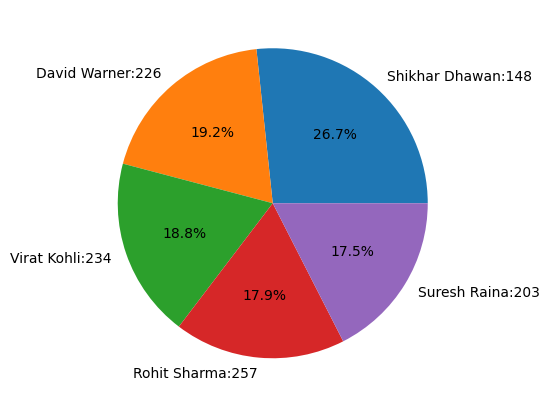

In [158]:
label1 = most_four['Player'] + ':' + most_four['6s'].astype(str)
plt.figure(figsize=(5,10))
plt.pie(most_sixes['6s'],autopct='%1.1f%%',labels=label1)
plt.show()

#### Top 5 players with Most 4's

In [143]:
df.head()

,POS,Player,Team,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Virat Kohli,RCB,237,229,34,7263,113,37.25,5586,130.02,7,50,643,234
1,2,Shikhar Dhawan,PKBS,217,216,29,6617,106,35.39,5203,127.18,2,50,750,148
2,3,David Warner,DC,176,176,22,6397,126,41.54,4572,139.92,4,60,646,226
3,4,Rohit Sharma,MI,243,238,28,6211,109,29.58,4776,130.05,1,42,554,257
4,5,Suresh Raina,CSK,205,200,30,5528,100,32.52,4042,136.76,1,39,506,203


In [145]:
most_four = df.sort_values(by='4s',ascending=False).head(5)

In [146]:
most_four

,POS,Player,Team,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
1,2,Shikhar Dhawan,PKBS,217,216,29,6617,106,35.39,5203,127.18,2,50,750,148
2,3,David Warner,DC,176,176,22,6397,126,41.54,4572,139.92,4,60,646,226
0,1,Virat Kohli,RCB,237,229,34,7263,113,37.25,5586,130.02,7,50,643,234
3,4,Rohit Sharma,MI,243,238,28,6211,109,29.58,4776,130.05,1,42,554,257
4,5,Suresh Raina,CSK,205,200,30,5528,100,32.52,4042,136.76,1,39,506,203


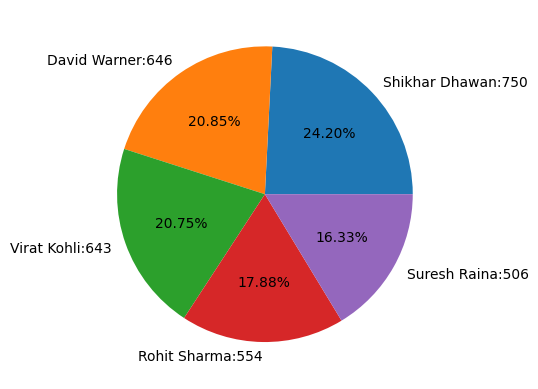

In [159]:
label2 = most_four['Player'] + ':' + most_four['4s'].astype(str)
plt.Figure(figsize=(5,10))
plt.pie(most_four['4s'],autopct='%1.2f%%',labels=label2)
plt.show()